# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [543]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sinasc = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [611]:
sinasc.loc[sinasc['APGAR5']<=3 , 'Grau_Asfixia' ] = 'Asfixia_grave'
sinasc.loc[(sinasc['APGAR5']>=4) & (sinasc['APGAR5']<=5) , 'Grau_Asfixia' ] = 'Asfixia_Moderada'
sinasc.loc[(sinasc['APGAR5']>=6) & (sinasc['APGAR5']<=7), 'Grau_Asfixia' ] = 'Asfixia_Leve'
sinasc.loc[sinasc['APGAR5']>=8, 'Grau_Asfixia' ] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='Grau_Asfixia,SEXO'>

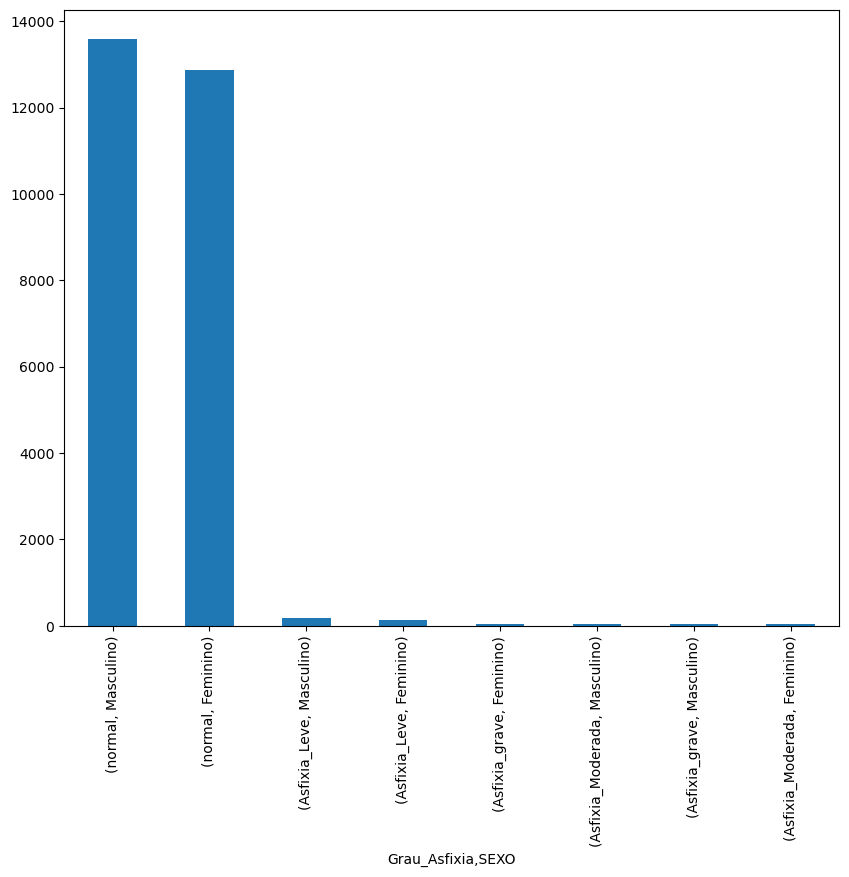

In [549]:
sinasc[['Grau_Asfixia','SEXO']].value_counts().plot.bar()

In [550]:
#plt.rc('figure', figsize=(10, 8))
#fig, axes = plt.subplots(2, 2)

#sns.countplot(ax = axes[0, 0], x='Axfixia_grave', data=sinasc['Grau_Asfixia'])
#sns.countplot(ax = axes[0, 1], x='Axfixia_moderada', data=sinasc['Grau_Asfixia'])
#sns.countplot(ax = axes[1, 0], x='Axfixia_leve', data=sinasc['Grau_Asfixia'])
#sns.countplot(ax = axes[1, 1], x='normal', data=sinasc['Grau_Asfixia'])

<Axes: ylabel='count'>

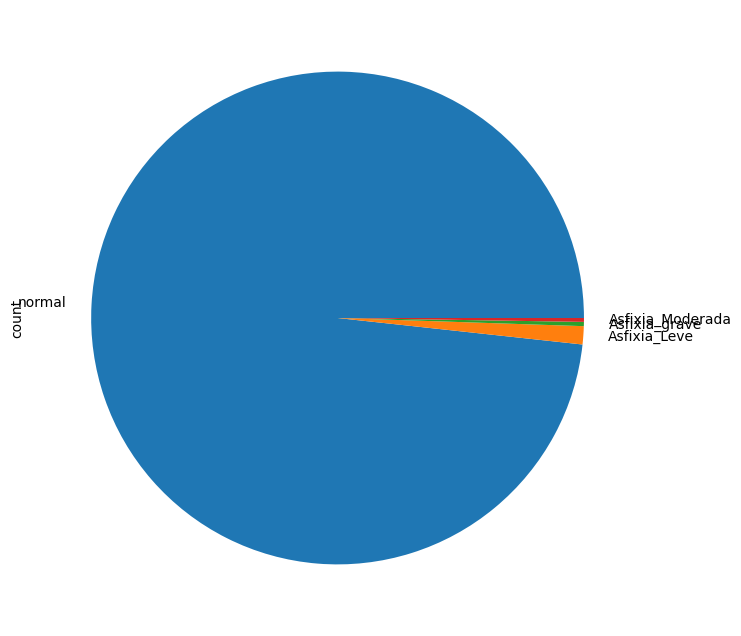

In [553]:
sinasc['Grau_Asfixia'].value_counts().plot.pie()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

<Axes: xlabel='GESTACAO'>

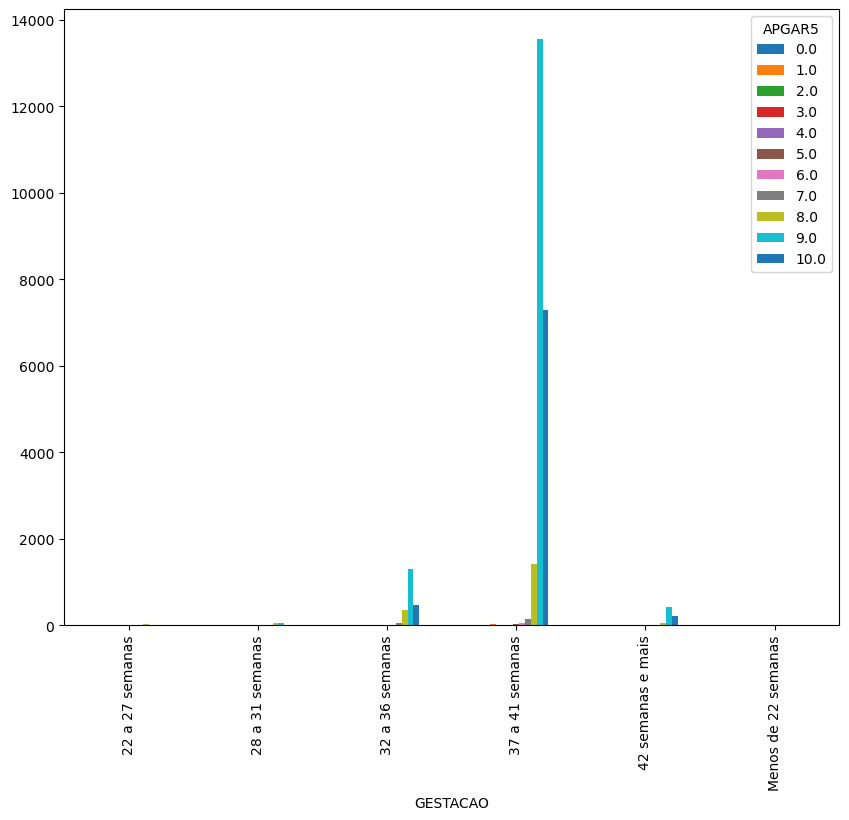

In [556]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
freq.plot.bar()

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [559]:
freq.sum(axis = 1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [643]:
freq_pctlin = freq.div(freq.sum(axis = 0), axis = 1)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.4375,0.000000,0.5000,0.428571,0.047619,0.000,0.027778,0.042735,0.012579,0.001236,0.001001
28 a 31 semanas,0.0000,0.000000,0.1250,0.071429,0.238095,0.175,0.097222,0.047009,0.031971,0.003578,0.001626
32 a 36 semanas,0.1250,0.090909,0.1250,0.142857,0.380952,0.275,0.236111,0.239316,0.189727,0.085025,0.058169
37 a 41 semanas,0.3125,0.909091,0.1875,0.357143,0.333333,0.525,0.625000,0.645299,0.742662,0.882449,0.911183
42 semanas e mais,0.0625,0.000000,0.0000,0.000000,0.000000,0.025,0.013889,0.021368,0.023061,0.027518,0.027896
Menos de 22 semanas,0.0625,0.000000,0.0625,0.000000,0.000000,0.000,0.000000,0.004274,0.000000,0.000195,0.000125


In [645]:
freq_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.499019
28 a 31 semanas        0.790929
32 a 36 semanas        1.948067
37 a 41 semanas        6.431161
42 semanas e mais      0.201231
Menos de 22 semanas    0.129594
dtype: float64

<Axes: xlabel='GESTACAO'>

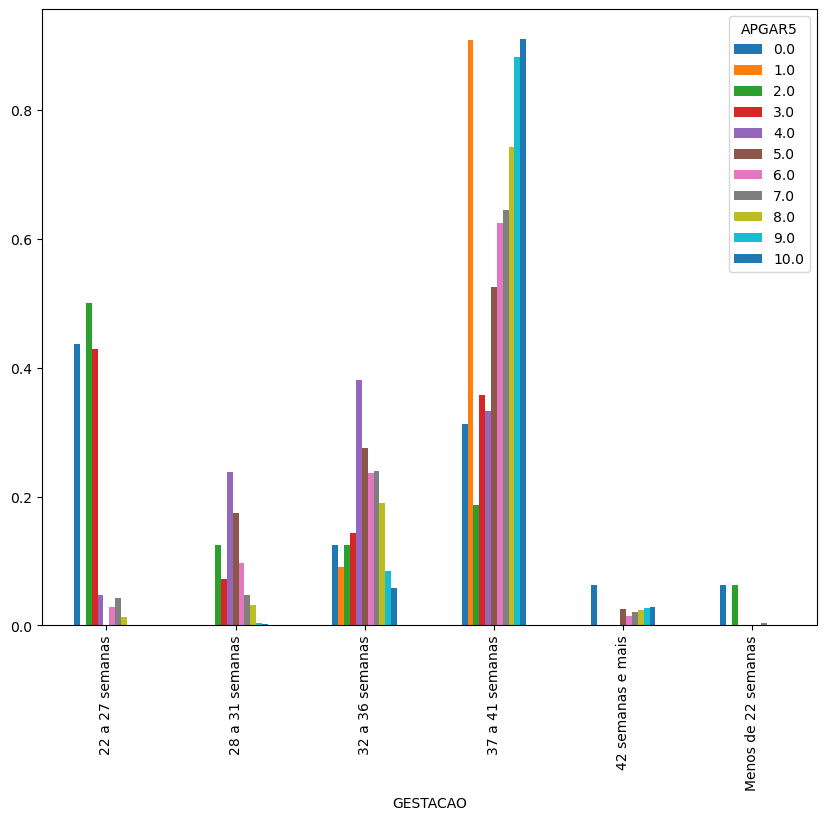

In [647]:
freq_pctlin.plot.bar()

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [568]:
sinasc.loc[(sinasc['GESTACAO'] > '4' ) & (sinasc['APGAR5'] > 7), 'PREMATURO' ] = 'SIM'
sinasc.loc[(sinasc['GESTACAO'] < '4' ) & (sinasc['APGAR5'] > 7), 'PREMATURO' ] = 'SIM'
sinasc.loc[(sinasc['GESTACAO'] > '4' ) & (sinasc['APGAR5'] <= 8), 'PREMATURO' ] = 'NÃO'
sinasc.loc[(sinasc['GESTACAO'] < '4' ) & (sinasc['APGAR5'] <= 8), 'PREMATURO' ] = 'NÃO'

<Axes: xlabel='Grau_Asfixia,PREMATURO'>

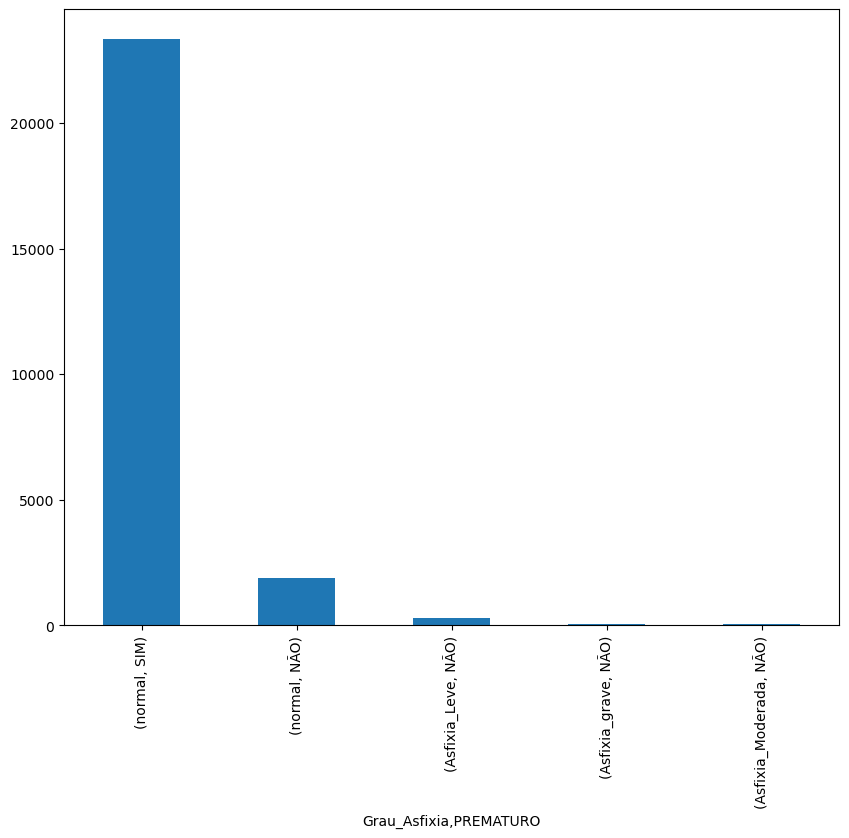

In [570]:
sinasc[['Grau_Asfixia','PREMATURO']].value_counts().plot.bar()

<Axes: xlabel='GESTACAO'>

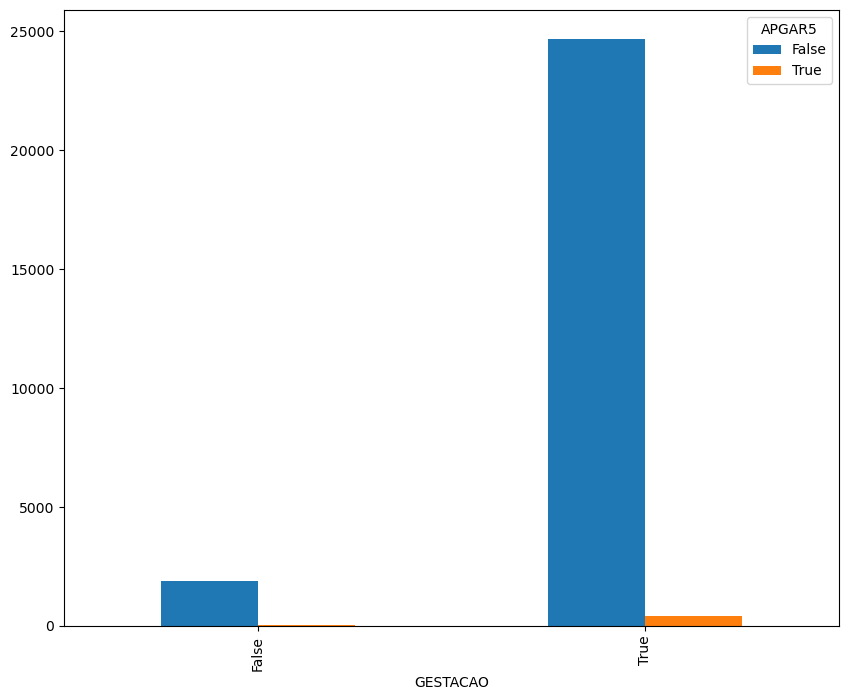

In [572]:
freq_2 = pd.crosstab((sinasc['GESTACAO'] < '4'), (sinasc['APGAR5']<=7))
#freq_2.boxplot()
freq_2.plot.bar()

In [574]:
freq_2.sum(axis = 1)

GESTACAO
False     1939
True     25089
dtype: int64

In [576]:
freq_2_pctlin = freq_2.div(freq_2.sum(axis = 1), axis = 0)
freq_2_pctlin

APGAR5,False,True
GESTACAO,,
False,0.980402,0.019598
True,0.983100,0.016900


In [578]:
freq_2_pctlin.sum(axis = 1)

GESTACAO
False    1.0
True     1.0
dtype: float64

<Axes: xlabel='GESTACAO'>

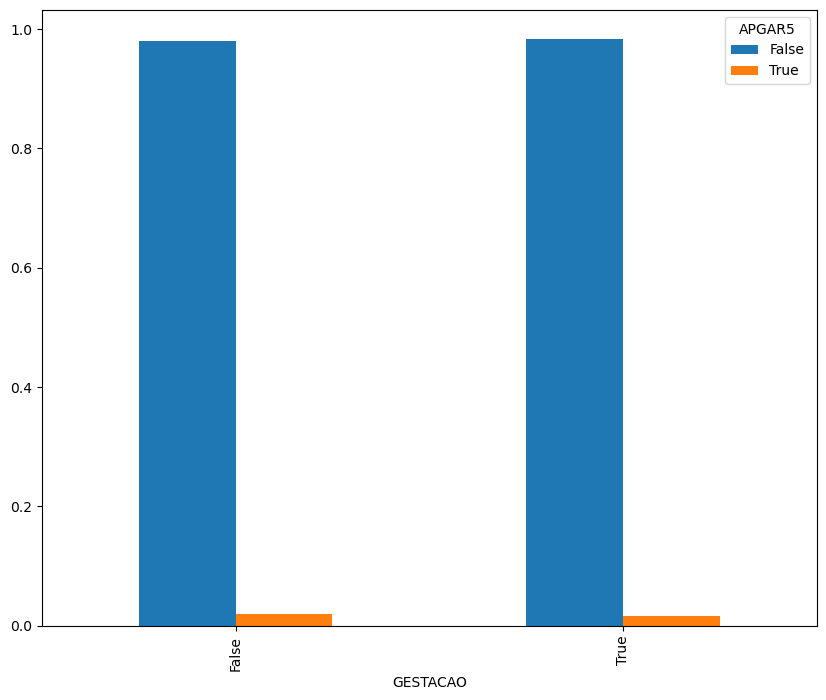

In [580]:
freq_2_pctlin.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [583]:
sinasc['PESO']

0        3685
1        3055
2        3460
3        2982
4        3310
         ... 
27023    2110
27024    3310
27025    3065
27026    2352
27027    4240
Name: PESO, Length: 27028, dtype: int64

In [670]:
asfixia_grave_linhas = sinasc.loc[sinasc['Grau_Asfixia'] == 'Asfixia_grave']
asfixia_grave_linhas.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Grau_Asfixia,PREMATURO
20,1,NaN,110001,4,29,5.0,4 a 7 anos,621005.0,3.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Asfixia_grave,NÃO
185,1,2494299.0,110002,1,24,1.0,8 a 11 anos,999992.0,0.0,1.0,...,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571,Asfixia_grave,NÃO


<Axes: xlabel='PESO', ylabel='APGAR5'>

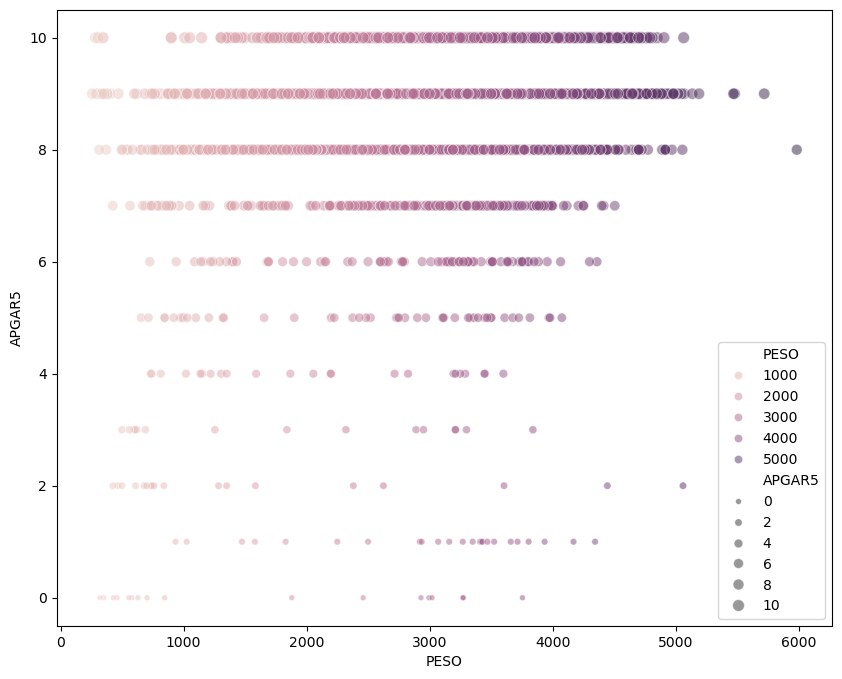

In [668]:
#sinasc[['APGAR5', 'PESO']].value_counts().plot.bar()
sns.scatterplot(x = 'PESO'
                , y = 'APGAR5'
                , data = sinasc
                , alpha = .5
                , hue = 'PESO'
                , size = 'APGAR5'
               )

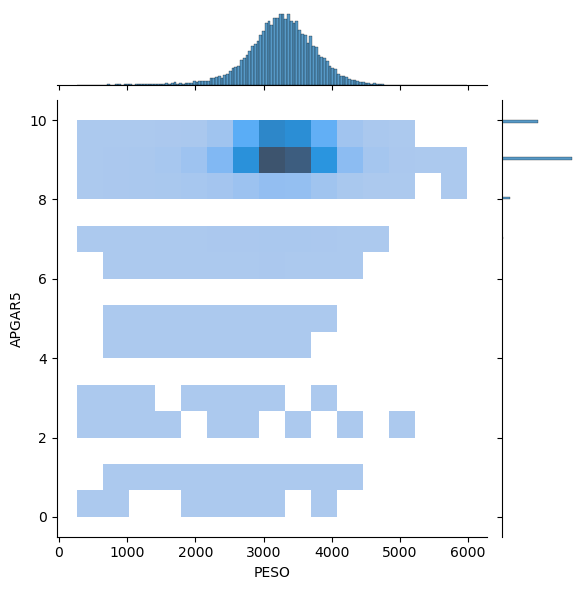

In [673]:
sns.jointplot(x = 'PESO'
              , y = 'APGAR5'
              , data = sinasc
              , kind="hist"
              , bins = [15, 15])

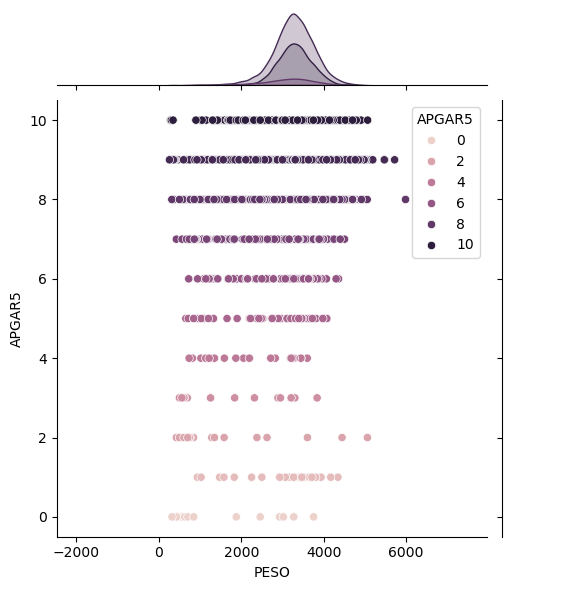

In [681]:
sns.jointplot(data=sinasc, x="PESO", y="APGAR5", hue = 'APGAR5')